# Skin Cancer Detection

**load packages**

In [106]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# miscellaneous
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# machine learning and deep learning stack
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder

# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow.keras.applications.densenet import DenseNet121

**Load data**

In [107]:
train = pd.read_csv("Augmentation/train_df.csv")
test = pd.read_csv("Augmentation/test_df.csv")

In [108]:
train.shape, test.shape

((600, 58), (60, 58))

In [109]:
train

,background_father_BRAZIL,background_father_GERMANY,background_father_ITALY,background_father_NETHERLANDS,background_father_POLAND,background_father_POMERANIA,background_father_PORTUGAL,background_father_SPAIN,background_father_UNK,background_mother_FRANCE,...,pesticide,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,diameter_1,diameter_2,diagnostic,img_id
0,0,0,0,1,0,0,0,0,0,1,...,1,1,1,1,1,-0.409295,0.181835,0.160545,ACK,PAT_673_3928_888.png
1,0,1,0,0,0,0,0,0,0,0,...,0,1,1,1,0,-0.409295,-0.143436,0.160545,ACK,PAT_834_4490_317.png
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0.978066,-0.685556,-0.639522,ACK,PAT_753_1427_496.png
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,-0.409295,-0.468708,-0.839539,ACK,PAT_457_890_255.png
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,-0.409295,-0.577132,-0.639522,ACK,PAT_872_1708_841.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,1,0.700594,0.181835,0.240552,SEK,PAT_1411_1415_723.png
596,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,2.365427,-0.360284,-0.439505,SEK,PAT_93_361_231.png
597,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,1,-0.409295,-0.685556,-0.639522,SEK,PAT_625_1184_412.png
598,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0.978066,0.615530,1.360646,SEK,PAT_87_133_391.png


In [110]:
train = train.sample(frac = 1).reset_index()

In [111]:
train

,index,background_father_BRAZIL,background_father_GERMANY,background_father_ITALY,background_father_NETHERLANDS,background_father_POLAND,background_father_POMERANIA,background_father_PORTUGAL,background_father_SPAIN,background_father_UNK,...,pesticide,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,diameter_1,diameter_2,diagnostic,img_id
0,330,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,-0.409295,-0.685556,-1.039556,NEV,PAT_641_3704_317.png
1,311,0,0,0,0,0,1,0,0,0,...,0,1,1,0,0,-0.409295,-0.468708,-1.039556,NEV,PAT_957_1814_77.png
2,191,0,1,0,0,0,0,0,0,0,...,0,1,1,1,1,-0.409295,-0.468708,-0.439505,BCC,PAT_83_126_513.png
3,481,0,0,1,0,0,0,0,0,0,...,0,1,1,1,1,0.978066,-0.577132,-0.639522,SCC,PAT_359_741_966.png
4,12,0,0,1,0,0,0,0,0,0,...,1,0,1,1,1,-0.409295,2.567159,1.360646,ACK,PAT_91_356_74.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,560,0,1,0,0,0,0,0,0,0,...,0,1,1,1,1,-0.409295,-0.577132,-0.839539,SEK,PAT_354_1814_619.png
596,262,0,0,0,0,0,1,0,0,0,...,1,1,1,1,1,-0.409295,1.916616,2.160713,MEL,PAT_719_1361_160.png
597,195,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,-0.409295,2.241888,3.960864,BCC,PAT_272_420_25.png
598,409,0,1,0,0,0,0,0,0,0,...,0,0,1,1,1,-0.409295,0.073411,0.360562,SCC,PAT_271_418_14.png


In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          600 non-null    int64  
 1   background_father_BRAZIL       600 non-null    int64  
 2   background_father_GERMANY      600 non-null    int64  
 3   background_father_ITALY        600 non-null    int64  
 4   background_father_NETHERLANDS  600 non-null    int64  
 5   background_father_POLAND       600 non-null    int64  
 6   background_father_POMERANIA    600 non-null    int64  
 7   background_father_PORTUGAL     600 non-null    int64  
 8   background_father_SPAIN        600 non-null    int64  
 9   background_father_UNK          600 non-null    int64  
 10  background_mother_FRANCE       600 non-null    int64  
 11  background_mother_GERMANY      600 non-null    int64  
 12  background_mother_ITALY        600 non-null    int

**features**

In [113]:
X_train = train.drop(['diagnostic','img_id', 'index'], axis=1).astype(float)

In [114]:
TOTAL_FEATURES = X_train.shape[1]
TOTAL_FEATURES

56

**Encode Target**

In [115]:
CLASSES = sorted(train['diagnostic'].unique())

In [116]:
CLASSES

['ACK', 'BCC', 'MEL', 'NEV', 'SCC', 'SEK']

In [117]:
ohe = OneHotEncoder()
y_train = ohe.fit_transform(
    train['diagnostic'].values.reshape(-1, 1)
)
y_train = np.array(y_train.todense())

In [118]:
y_train

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [119]:
train['diagnostic']

0      NEV
1      NEV
2      BCC
3      SCC
4      ACK
      ... 
595    SEK
596    MEL
597    BCC
598    SCC
599    MEL
Name: diagnostic, Length: 600, dtype: object

In [120]:
def build_ann():
    '''
    complies a model by stacking dense layers
    '''
    # initialize the Sequential API to stack the layers
    model = keras.Sequential()
    
    # input layer
    model.add(
        keras.layers.Input(
            shape=(TOTAL_FEATURES,)
        )
    )
    # hidden layer
    model.add(
        keras.layers.Dense(
            units=16, 
            activation='sigmoid'
        )
    )
    # dropout 
    model.add(
        keras.layers.Dropout(
            rate=0.5
        )
    )
    # output layer with softmax activation function
    model.add(
        keras.layers.Dense(
            len(CLASSES),
            activation='softmax'
        )
    )
    return model

In [121]:
def complie_ann(ann):
    """
    """
    ann.compile(
        optimizer=keras.optimizers.Adam(),
        loss=keras.losses.categorical_crossentropy,
        metrics=[keras.metrics.categorical_accuracy]
    )
    return ann

### Model Training

**train model**

In [122]:
# instantiate model
model = build_ann()
model = complie_ann(model)

In [123]:
# early stopping

stop_early = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=20
)

In [124]:
model.fit(
    X_train,
    y_train,
    epochs=1_000,
    batch_size=50,
    callbacks=[stop_early],
    validation_split=1/6
)

Epoch 1/1000
10/10 [==============================] - 0s 11ms/step - loss: 2.3256 - categorical_accuracy: 0.1820 - val_loss: 2.1330 - val_categorical_accuracy: 0.1800
Epoch 2/1000
10/10 [==============================] - 0s 2ms/step - loss: 2.3196 - categorical_accuracy: 0.1540 - val_loss: 2.0774 - val_categorical_accuracy: 0.1800
Epoch 3/1000
10/10 [==============================] - 0s 2ms/step - loss: 2.2185 - categorical_accuracy: 0.1700 - val_loss: 2.0290 - val_categorical_accuracy: 0.1800
Epoch 4/1000
10/10 [==============================] - 0s 2ms/step - loss: 2.1198 - categorical_accuracy: 0.2140 - val_loss: 1.9870 - val_categorical_accuracy: 0.1900
Epoch 5/1000
10/10 [==============================] - 0s 2ms/step - loss: 2.0789 - categorical_accuracy: 0.1880 - val_loss: 1.9522 - val_categorical_accuracy: 0.1900
Epoch 6/1000
10/10 [==============================] - 0s 2ms/step - loss: 2.0901 - categorical_accuracy: 0.1760 - val_loss: 1.9212 - val_categorical_accuracy: 0.2100
Epo

**training history: losses and epoch numbers**

In [17]:
# losses in the training history
losses = pd.DataFrame(model.history.history)
# training loss
loss = losses['loss'].values 
# validation loss
val_loss = losses['val_loss'].values

# epoch number
epoch = losses.index.values + np.ones_like(losses.index.values)

**plot training history**

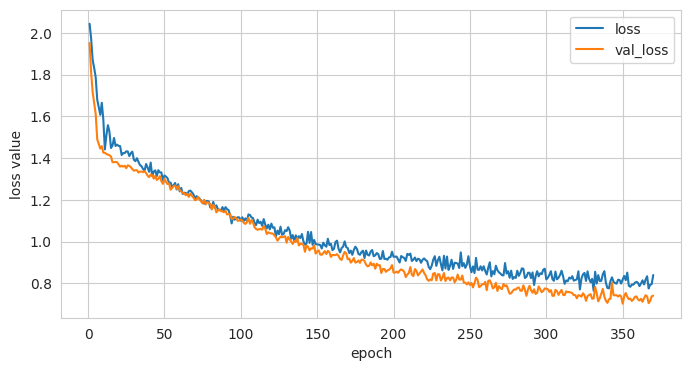

In [18]:
# plot losses against epoch number in log-scale
plt.figure(figsize=(8,4),dpi=100)
plt.plot(epoch, loss, linewidth=1.5, label='loss')
plt.plot(epoch, val_loss, linewidth=1.5, label='val_loss')

plt.xlabel('epoch',fontsize=10)
plt.ylabel('loss value',fontsize=10)
plt.legend(loc=1,fontsize=10);

### Model Evaluation

**features and target**

In [19]:
X_test = test.drop(['diagnostic','img_id'], axis=1).astype(float)

In [20]:
y_test = ohe.transform(
    test['diagnostic'].values.reshape(-1, 1)
)
y_test = np.array(y_test.todense())

In [21]:
def hard_prediction(model, X, y):
    """
    returns dataframe with class probabilities 
    and true class label 
    """
    # prediction dataframe along with true class
    pred = model.predict(X,verbose=0)
    pred = np.array(
        [pred[i]==pred[i].max() for i in range(len(pred))]
    ).astype(int)
    
    df_pred = pd.DataFrame(
        columns=CLASSES,
        data=pred
    )
    # convert vectorized classes into strings
    df_pred['class'] = \
    [''.join([i*j for (i,j) in zip(CLASSES,vector)]) for vector in y.astype(int)]
    
    return df_pred

In [22]:
hard_prediction(model, X_test, y_test)

,ACK,BCC,MEL,SCC,class
0,1,0,0,0,ACK
1,0,1,0,0,BCC
2,0,0,1,0,MEL
3,0,0,1,0,MEL
4,0,1,0,0,BCC
5,0,1,0,0,BCC
6,0,1,0,0,BCC
7,0,0,0,1,BCC
8,1,0,0,0,ACK
9,0,0,1,0,MEL


In [23]:
def accuracy_score(model,X,y):
    """
    This function spits out multi-class accuracy
    """
    grouped_df = hard_prediction(model, X, y).groupby('class').sum()
    
    grouped_df.sort_index(axis=1,inplace=True)
    
    accuracy_score = np.trace(grouped_df)/np.array(grouped_df).sum()
    accuracy_score = round(accuracy_score,6)
    
    return accuracy_score

In [24]:
accuracy_score(model, X_train, y_train)

0.783333

In [25]:
accuracy_score(model, X_test, y_test)

0.75